## Group 

    Member 1
    Haingoharijao Faniriniaina Ramandiamanana
    Member 3
    Lloyd Acquaye Thompson

In [234]:
import torch
import numpy as np
import pandas as pd

In [235]:
!which python

/home/thompson/anaconda3/bin/python


In [236]:
import torchaudio

In [237]:
import os
import glob

In [238]:
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [239]:
class AudioDataset(Dataset):
    """
    A rapper class for the UrbanSound8K dataset.
    """

    def __init__(self, file_path, audio_paths, folds):
        """
        Args:
            file_path(string): path to the audio csv file
            root_dir(string): directory with all the audio folds
            folds: integer corresponding to audio fold number or list of fold number if more than one fold is needed
        """
        self.audio_file = pd.read_csv(file_path)
        self.folds = folds
        self.audio_paths = glob.glob(audio_paths + '/*' + str(self.folds) + '/*')
    
    

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, idx):
        
        audio_path = self.audio_paths[idx]
        audio, rate = torchaudio.load(audio_path, normalization=True)
        audio = audio.mean(0, keepdim=True)
        c, n = audio.shape
        zero_need = 160000 - n
        audio_new = F.pad(audio, (zero_need //2, zero_need //2), 'constant', 0)
        audio_new = audio_new[:,::5]
        
        #Getting the corresponding label
        audio_name = audio_path.split(sep='/')[-1]
        labels = self.audio_file.loc[self.audio_file.slice_file_name == audio_name].iloc[0,-2]
        
        return audio_new, labels

In [240]:
AudioDataset?

In [241]:
from IPython.display import Audio

In [242]:
file_path = '/home/thompson/Downloads/UrbanSound8K/metadata/UrbanSound8K.csv'
audio_path = '/home/thompson/Downloads/UrbanSound8K/audio'

In [243]:
datasets = AudioDataset(file_path = file_path, audio_paths = audio_path, folds = [1, 2, 3, 4, 5, 6, 7, 8, 9])


In [244]:
datasets_test = AudioDataset(file_path = file_path, audio_paths= audio_path, folds = 10)

In [245]:
datasets[0][0].shape

torch.Size([1, 32000])

In [246]:
Audio(datasets[0][0], rate = 8000)

In [247]:
datasets[0][1]

7

In [248]:
Data_loader = DataLoader(datasets, batch_size = 50, shuffle =False, num_workers = 2)

In [249]:
test_loader = DataLoader(datasets_test, batch_size = 50, shuffle =False, num_workers = 2)

In [250]:
# j = 0
# for i, (batch, target) in enumerate(datasets):
#     print(batch, target)

In [254]:
import torch.nn as nn
M3 = nn.Sequential(
    #Conv 1
    nn.Conv1d(1, 256, 80, 4, padding = 38),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
# #     #conv 2
    nn.Conv1d(256, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
    nn.AvgPool1d(500),
    nn.Flatten(),
    nn.Linear(256, 10),
    nn.Softmax(1)
            )
audio = torch.zeros(1, 32000)
M3(audio.unsqueeze(0)).shape

torch.Size([1, 10])

In [260]:
M5 = nn.Sequential(
    #Conv 1
    nn.Conv1d(1, 128, 80, 4, padding = 38),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
      #conv 2
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    nn.MaxPool1d(4),

    #conv 3
    nn.Conv1d(128, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    nn.MaxPool1d(4), 
    #Conv 4
    nn.Conv1d(256, 512, 3, padding = 3),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
#     nn.AvgPool1d(32)
    nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(512, 10),
    nn.Softmax(1)
            )
audio = torch.zeros(1, 32000)
M5(audio.unsqueeze(0)).shape

torch.Size([1, 128, 8000])

In [262]:
M11 = nn.Sequential(
    #Conv 1
    nn.Conv1d(1, 64, 80, 4, padding = 38),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
     #conv 2, 1
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
     #conv 2, 2
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
    #Conv 3, 1
    nn.Conv1d(64, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    #Conv 3, 2
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
    #Conv 4, 1
    nn.Conv1d(128, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #Conv 4, 2
    nn.Conv1d(256, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #Conv 4, 3
    nn.Conv1d(256, 256, 3, padding = 3),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
    #Conv 5, 1
    nn.Conv1d(256, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    #Conv 5, 2
    nn.Conv1d(512, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(512, 10),
    nn.Softmax(1)
             )
audio = torch.zeros(1, 32000)
M11(audio.unsqueeze(0)).shape

torch.Size([1, 64, 7981])

In [264]:
M18 = nn.Sequential(
    #Conv 1
    nn.Conv1d(1, 64, 80, 4, padding = 38),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    #conv 2, 1
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
#      #conv 2, 2
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
#     #Conv 2, 3
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
#     #Conv 2, 4
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
#     #Conv 3, 1
    nn.Conv1d(64, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
#     #Conv 3, 2
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
#     #Conv 3, 3
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    #conv 3, 4
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
#     #Conv 4, 1
    nn.Conv1d(128, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
#     #Conv 4, 2
    nn.Conv1d(256, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
        
#     #Conv 4, 3
    nn.Conv1d(256, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
#     #Conv 4, 4
    nn.Conv1d(256, 256, 3, padding = 3),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
        
#     #Conv 5, 1
    nn.Conv1d(256, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
#     #Conv 5, 2
    nn.Conv1d(512, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
        
#     #Conv 5, 3
    nn.Conv1d(512, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
#     #Conv 5, 4
    nn.Conv1d(512, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(512, 10),
    nn.Softmax(1)
             )
audio = torch.zeros(1, 32000)
M18(audio.unsqueeze(0)).shape

torch.Size([1, 128, 500])

In [255]:
from torch import optim
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(M3.parameters(), lr =1e-2, weight_decay = 0.0001)

In [256]:
M3.train()

Sequential(
  (0): Conv1d(1, 256, kernel_size=(80,), stride=(4,), padding=(38,))
  (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (4): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (8): AvgPool1d(kernel_size=(500,), stride=(500,), padding=(0,))
  (9): Flatten()
  (10): Linear(in_features=256, out_features=10, bias=True)
  (11): Softmax(dim=1)
)

In [257]:
def accuracy(output, target, topk = (1,)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)
        
        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))
        
        res =[]
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim = True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [258]:
top_1_train = []
top_1_test = []
loss_train = []
loss_test = []

for epoch in range(7):
    print('Epoch: {}'.format(epoch))
   

    correct = 0
    avg_losses = []
    for i, (batch, target) in enumerate(Data_loader):
        optimizer.zero_grad()
        
        outputs = M3(batch)
        
        loss_ = loss(outputs, target)
        avg_losses.append(loss_)
        
        loss_.backward()
        
        optimizer.step()
        
        correct += accuracy(outputs, target)[0].item() * batch.size(0) / 100
        
    avg_loss = torch.tensor(avg_losses).mean()  
    loss_train.append(avg_loss)
    
    top_1 = correct / len(Data_loader.dataset) * 100
    top_1_train.append(top_1)
    print('Train Accuracy: {:.2f}%'.format(top_1))
    
    
    with torch.no_grad():
        M3.eval()
        correct = 0
        avg_losses = []
        for i, (batch, target) in enumerate(test_loader):
            outputs = M3(batch)
            loss_ = loss(outputs, target)
            avg_losses.append(loss_)
            
            correct += accuracy(outputs, target)[0].item() * batch.size(0) / 100
            
    avg_loss = torch.tensor(avg_losses).mean()
    loss_test.append(avg_loss)
    
    top_1 = correct / len(test_loader.dataset) * 100
    top_1_test.append(top_1)
    
    print('Test Accuracy: {}'.format(top_1))

Epoch: 0
Train Accuracy: 25.24%
Test Accuracy: 30.107526954641763
Epoch: 1
Train Accuracy: 24.36%
Test Accuracy: 19.713261685206184
Epoch: 2
Train Accuracy: 24.93%
Test Accuracy: 24.731182850389924
Epoch: 3
Train Accuracy: 27.16%
Test Accuracy: 24.372759842958075
Epoch: 4
Train Accuracy: 28.35%
Test Accuracy: 28.195937928048227
Epoch: 5
Train Accuracy: 30.80%
Test Accuracy: 29.151732382096412
Epoch: 6
Train Accuracy: 31.89%
Test Accuracy: 26.403823232707722


In [94]:
outputs = M3(batch)

In [96]:
outputs.shape

torch.Size([45, 256, 10])

In [133]:
torch.optim.lr_scheduler.LambdaLR?

In [134]:
optim.Adam?

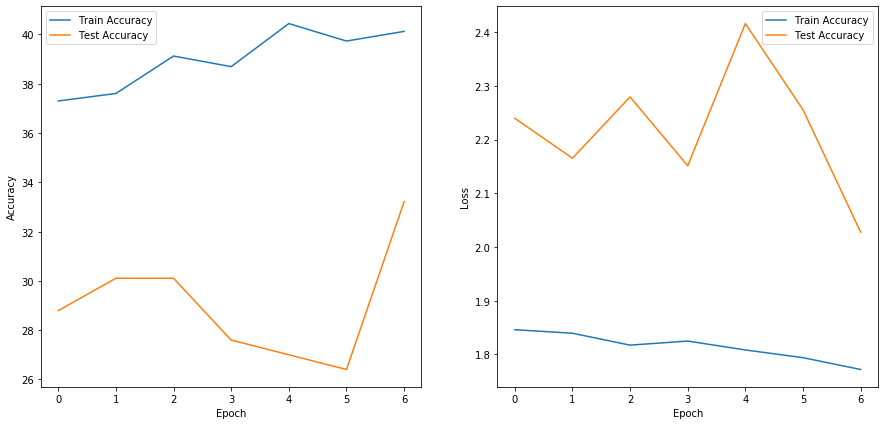

In [154]:
plt.figure(figsize = (15, 7))
plt.subplot(121)
plt.plot(top_1_train, label = 'Train Accuracy')
plt.plot(top_1_test, label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(122)
plt.plot(loss_train, label = 'Train Accuracy')
plt.plot(loss_test, label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [150]:
import matplotlib.pyplot as plt

def plot_(top_1_train, top_1_test, loss_train, loss_test):
    plt.figure(figsize = (7, 5))
    plt.subplot(121)
    plt.plot(top_1_train, label = 'Train Accuracy')
    plt.plot(top_1_test, label = 'Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(122)
    plt.plot(loss_train, label = 'Train Accuracy')
    plt.plot(loss_test, label = 'Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    

In [147]:
l = torch.tensor([1.,2.,3.])
l.mean()

tensor(2.)

In [259]:
top_1_train = []
top_1_test = []
loss_train = []
loss_test = []

for epoch in range(7):
    print('Epoch: {}'.format(epoch))
   

    correct = 0
    avg_losses = []
    for i, (batch, target) in enumerate(Data_loader):
        optimizer.zero_grad()
        
        outputs = M5(batch)
        
        loss_ = loss(outputs, target)
        avg_losses.append(loss_)
        
        loss_.backward()
        
        optimizer.step()
        
        correct += accuracy(outputs, target)[0].item() * batch.size(0) / 100
        
    avg_loss = torch.tensor(avg_losses).mean()  
    loss_train.append(avg_loss)
    
    top_1 = correct / len(Data_loader.dataset) * 100
    top_1_train.append(top_1)
    print('Train Accuracy: {:.2f}%'.format(top_1))
    
    
    with torch.no_grad():
        M5.eval()
        correct = 0
        avg_losses = []
        for i, (batch, target) in enumerate(test_loader):
            outputs = M5(batch)
            loss_ = loss(outputs, target)
            avg_losses.append(loss_)
            
            correct += accuracy(outputs, target)[0].item() * batch.size(0) / 100
            
    avg_loss = torch.tensor(avg_losses).mean()
    loss_test.append(avg_loss)
    
    top_1 = correct / len(test_loader.dataset) * 100
    top_1_test.append(top_1)
    
    print('Test Accuracy: {}'.format(top_1))

Epoch: 0
Train Accuracy: 7.78%


OSError: [Errno 12] Cannot allocate memory